In [3]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
# Step 2: Load dataset
df = pd.read_csv('car_component_failure_.csv')

df

,Car_ID,Component,Mileage,Car_Age,Part_Age,Temp_Exposure,Service_Count,Driving_Style,Failed_Next_30_Days
0,1,Brakes,39184,1.4,291,27.3,2,Conservative,No
1,2,Engine,187392,11.4,568,22.6,6,Aggressive,Yes
2,3,Engine,70990,8.1,37,36.8,10,Conservative,Yes
3,4,Engine,127757,9.2,838,46.1,2,Conservative,Yes
4,5,Battery,50758,4.0,791,30.1,1,Moderate,Yes
...,...,...,...,...,...,...,...,...,...
15995,15996,Battery,94788,4.2,797,32.8,2,Aggressive,Yes
15996,15997,Battery,197912,12.0,197,33.9,5,Aggressive,Yes
15997,15998,Brakes,162703,15.0,706,48.5,6,Conservative,Yes
15998,15999,Brakes,85144,14.9,443,43.4,5,Conservative,Yes


In [5]:
df.shape

(16000, 9)

In [6]:
df.head()

,Car_ID,Component,Mileage,Car_Age,Part_Age,Temp_Exposure,Service_Count,Driving_Style,Failed_Next_30_Days
0,1,Brakes,39184,1.4,291,27.3,2,Conservative,No
1,2,Engine,187392,11.4,568,22.6,6,Aggressive,Yes
2,3,Engine,70990,8.1,37,36.8,10,Conservative,Yes
3,4,Engine,127757,9.2,838,46.1,2,Conservative,Yes
4,5,Battery,50758,4.0,791,30.1,1,Moderate,Yes


In [7]:
df.tail()

,Car_ID,Component,Mileage,Car_Age,Part_Age,Temp_Exposure,Service_Count,Driving_Style,Failed_Next_30_Days
15995,15996,Battery,94788,4.2,797,32.8,2,Aggressive,Yes
15996,15997,Battery,197912,12.0,197,33.9,5,Aggressive,Yes
15997,15998,Brakes,162703,15.0,706,48.5,6,Conservative,Yes
15998,15999,Brakes,85144,14.9,443,43.4,5,Conservative,Yes
15999,16000,Brakes,107981,12.5,423,22.2,1,Aggressive,Yes


In [8]:
df.isnull().sum()

Car_ID                 0
Component              0
Mileage                0
Car_Age                0
Part_Age               0
Temp_Exposure          0
Service_Count          0
Driving_Style          0
Failed_Next_30_Days    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Car_ID               16000 non-null  int64  
 1   Component            16000 non-null  object 
 2   Mileage              16000 non-null  int64  
 3   Car_Age              16000 non-null  float64
 4   Part_Age             16000 non-null  int64  
 5   Temp_Exposure        16000 non-null  float64
 6   Service_Count        16000 non-null  int64  
 7   Driving_Style        16000 non-null  object 
 8   Failed_Next_30_Days  16000 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 1.1+ MB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Car_ID,16000.0,8000.500000,4618.946489,1.0,4000.75,8000.5,12000.25,16000.0
Mileage,16000.0,104185.222562,55145.855946,10013.0,55914.50,103065.0,152018.00,199989.0
Car_Age,16000.0,8.026750,4.014616,1.0,4.50,8.1,11.50,15.0
Part_Age,16000.0,503.460125,286.832475,10.0,255.00,499.0,755.00,1000.0
Temp_Exposure,16000.0,34.982019,8.658186,20.0,27.50,35.0,42.50,50.0
Service_Count,16000.0,5.019812,3.158626,0.0,2.00,5.0,8.00,10.0


In [11]:
print(df.dtypes)

Car_ID                   int64
Component               object
Mileage                  int64
Car_Age                float64
Part_Age                 int64
Temp_Exposure          float64
Service_Count            int64
Driving_Style           object
Failed_Next_30_Days     object
dtype: object


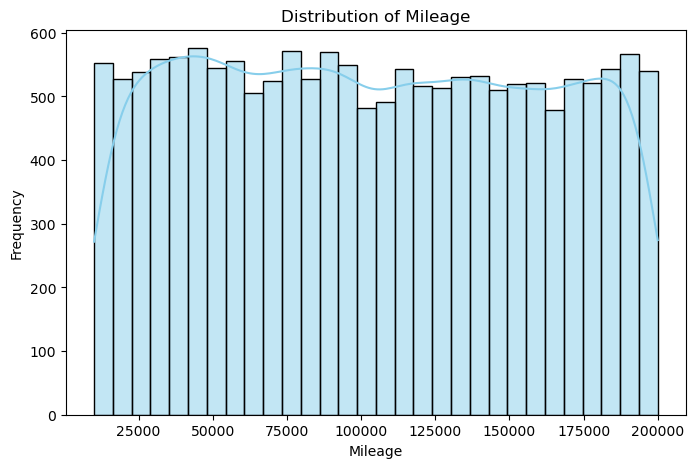

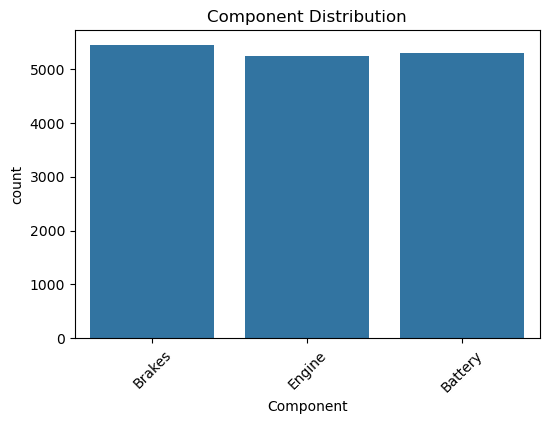

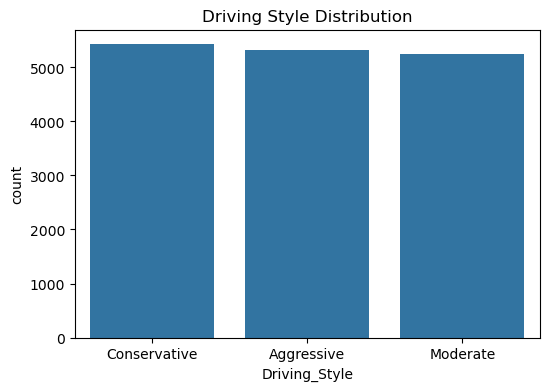

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['Mileage'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

# Component distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Component')
plt.title('Component Distribution')
plt.xticks(rotation=45)
plt.show()

# Driving Style distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Driving_Style')
plt.title('Driving Style Distribution')
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_17772\1851364733.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Failed_Next_30_Days', palette='Set2')


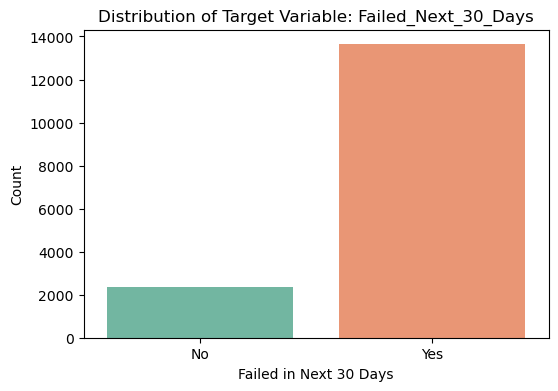

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Failed_Next_30_Days', palette='Set2')
plt.title('Distribution of Target Variable: Failed_Next_30_Days')
plt.xlabel('Failed in Next 30 Days')
plt.ylabel('Count')
plt.show()

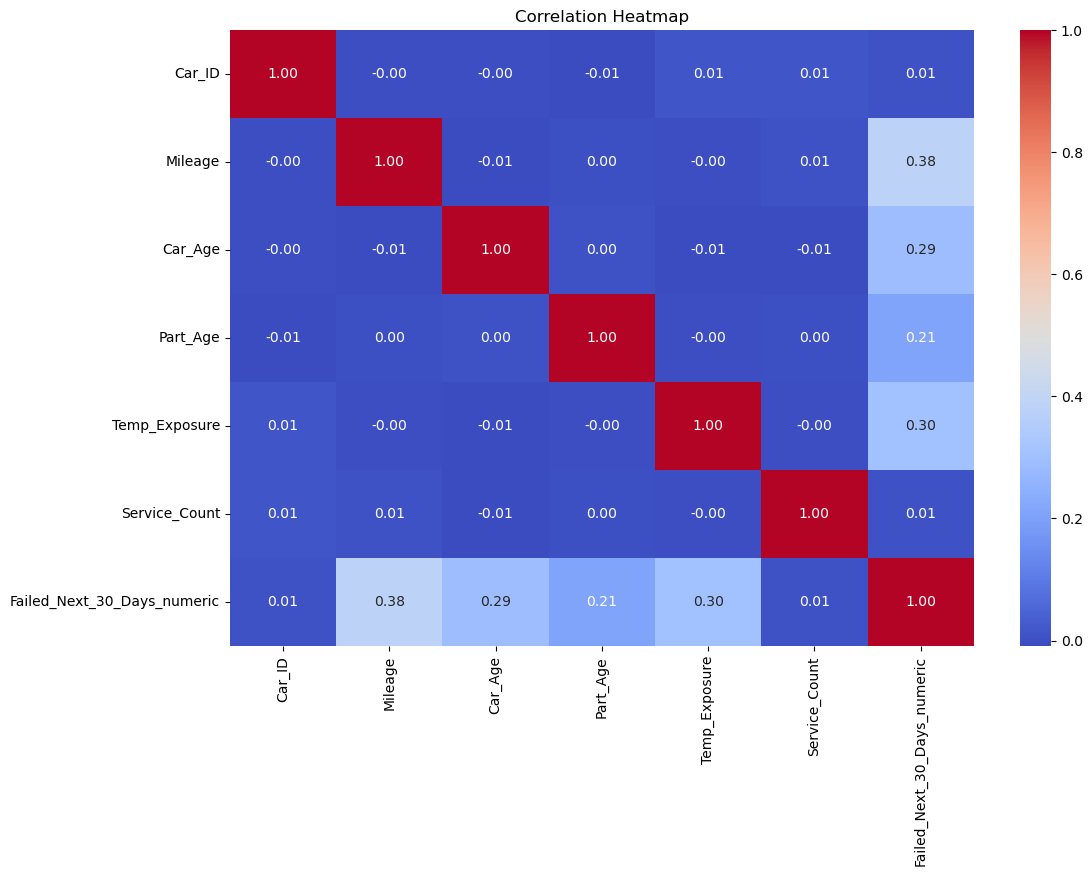

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert target column to numeric for correlation
df['Failed_Next_30_Days_numeric'] = df['Failed_Next_30_Days'].map({'No': 0, 'Yes': 1})

# Compute correlation matrix (only numeric columns)
corr_matrix = df.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [18]:
df.columns

Index(['Car_ID', 'Component', 'Mileage', 'Car_Age', 'Part_Age',
       'Temp_Exposure', 'Service_Count', 'Driving_Style',
       'Failed_Next_30_Days', 'Failed_Next_30_Days_numeric'],
      dtype='object')

In [19]:
# Step 3: Define Preprocessing Pipeline
numerical_cols = ['Mileage','Car_Age','Part_Age','Temp_Exposure', 'Service_Count']
categorical_cols = ['Component', 'Driving_Style']


In [20]:
# Numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


In [21]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

In [22]:
# Combine both pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols)
])

In [23]:
# Step 5: Split dataset
X = df.drop(['Car_ID', 'Failed_Next_30_Days', 'Failed_Next_30_Days_numeric'], axis=1)
y = df['Failed_Next_30_Days'].map({'No': 0, 'Yes': 1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
X

,Component,Mileage,Car_Age,Part_Age,Temp_Exposure,Service_Count,Driving_Style
0,Brakes,39184,1.4,291,27.3,2,Conservative
1,Engine,187392,11.4,568,22.6,6,Aggressive
2,Engine,70990,8.1,37,36.8,10,Conservative
3,Engine,127757,9.2,838,46.1,2,Conservative
4,Battery,50758,4.0,791,30.1,1,Moderate
...,...,...,...,...,...,...,...
15995,Battery,94788,4.2,797,32.8,2,Aggressive
15996,Battery,197912,12.0,197,33.9,5,Aggressive
15997,Brakes,162703,15.0,706,48.5,6,Conservative
15998,Brakes,85144,14.9,443,43.4,5,Conservative


In [25]:
y

0        0
1        1
2        1
3        1
4        1
        ..
15995    1
15996    1
15997    1
15998    1
15999    1
Name: Failed_Next_30_Days, Length: 16000, dtype: int64

In [26]:
# Step 5: Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train

,Component,Mileage,Car_Age,Part_Age,Temp_Exposure,Service_Count,Driving_Style
676,Brakes,79035,4.5,105,32.0,5,Aggressive
12113,Battery,59873,10.5,508,49.2,4,Conservative
7077,Battery,96110,4.6,147,26.7,7,Aggressive
13005,Brakes,160260,3.3,908,38.8,4,Moderate
12123,Engine,196366,8.8,954,36.1,9,Conservative
...,...,...,...,...,...,...,...
13418,Brakes,170845,4.7,757,25.4,6,Conservative
5390,Engine,21428,9.2,931,21.8,6,Aggressive
860,Brakes,121181,8.7,470,31.5,3,Aggressive
15795,Brakes,198691,12.1,533,45.6,5,Aggressive


In [28]:
X_test

,Component,Mileage,Car_Age,Part_Age,Temp_Exposure,Service_Count,Driving_Style
8756,Engine,194283,6.7,316,41.6,0,Moderate
4660,Battery,86169,1.5,842,46.0,1,Aggressive
6095,Brakes,186763,5.1,445,42.3,3,Conservative
304,Brakes,40991,7.5,173,32.2,8,Conservative
8241,Battery,74811,5.9,181,41.4,8,Moderate
...,...,...,...,...,...,...,...
15578,Brakes,60949,9.9,834,36.1,4,Moderate
5746,Engine,34377,2.2,644,44.3,7,Conservative
6395,Engine,161765,9.0,77,31.4,4,Aggressive
7624,Engine,47909,9.3,101,32.8,5,Moderate


In [29]:
y_train

676      0
12113    1
7077     1
13005    1
12123    1
        ..
13418    1
5390     1
860      1
15795    1
7270     1
Name: Failed_Next_30_Days, Length: 12800, dtype: int64

In [30]:
y_test

8756     1
4660     1
6095     1
304      0
8241     1
        ..
15578    1
5746     1
6395     1
7624     1
15245    1
Name: Failed_Next_30_Days, Length: 3200, dtype: int64

In [ ]:
# Step 6: Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)





In [26]:
X_train_processed

array([[-0.46425734,  1.        ,  0.        ],
       [-0.81151705,  0.        ,  1.        ],
       [-0.15481889,  0.        ,  0.        ],
       ...,
       [ 0.29952556,  1.        ,  0.        ],
       [ 1.70418585,  1.        ,  0.        ],
       [ 0.98654235,  0.        ,  2.        ]])

In [27]:
X_test_processed

array([[ 1.62430271,  2.        ,  2.        ],
       [-0.33497278,  0.        ,  0.        ],
       [ 1.48802293,  1.        ,  1.        ],
       ...,
       [ 1.03500141,  2.        ,  0.        ],
       [-1.02833238,  2.        ,  2.        ],
       [ 0.61550617,  2.        ,  1.        ]])

In [28]:
# Step 7: Train the model
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train_processed, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [29]:
y_pred = model.predict(X_test_processed)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8525

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.13      0.21       468
           1       0.87      0.98      0.92      2732

    accuracy                           0.85      3200
   macro avg       0.68      0.55      0.56      3200
weighted avg       0.81      0.85      0.81      3200


Confusion Matrix:
 [[  62  406]
 [  66 2666]]


In [36]:
# Step 8: Make predictions
y_pred = model.predict(X_test_processed)


In [31]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [32]:
# Step 9: Evaluate the model
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.8525

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.13      0.21       468
           1       0.87      0.98      0.92      2732

    accuracy                           0.85      3200
   macro avg       0.68      0.55      0.56      3200
weighted avg       0.81      0.85      0.81      3200


Confusion Matrix:
 [[  62  406]
 [  66 2666]]


C:\Users\asus\AppData\Local\Temp\ipykernel_18148\4260185635.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df, palette="Blues_d")


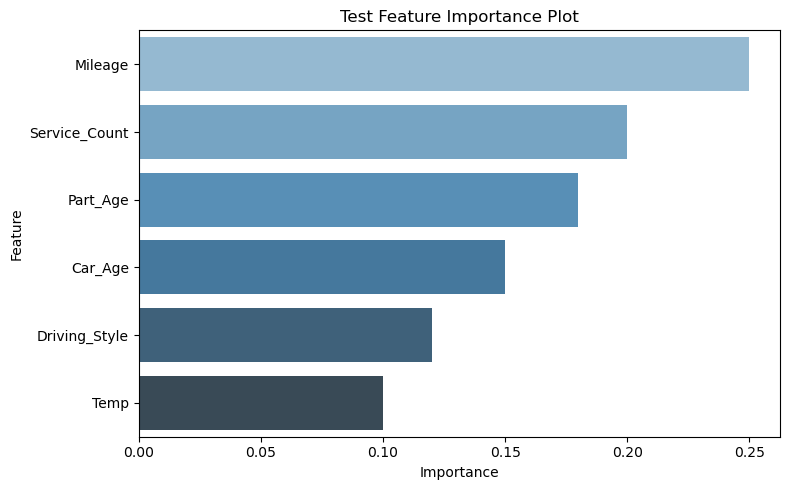

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dummy data to test plotting
data = {
    'Feature': ['Mileage', 'Car_Age', 'Part_Age', 'Temp', 'Service_Count', 'Driving_Style'],
    'Importance': [0.25, 0.15, 0.18, 0.10, 0.20, 0.12]
}


df = pd.DataFrame(data).sort_values(by="Importance", ascending=False)

# Create plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=df, palette="Blues_d")
plt.title("Test Feature Importance Plot")
plt.tight_layout()
plt.show()




In [34]:
import joblib 
joblib.dump(model,'randomforest_model.joblib')

['randomforest_model.joblib']